In [1]:
# code from 2-1 Hello World.py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import random
import tensorflow as tf

In [2]:
# Constants
NUM = 100
b_size = 5
epochs = 500

In [3]:
# Functions

def generateNoise():
	''' This function returns a small random value between -1.0 and 1.0
	'''
	if np.random.random()>0.5:
		sign=1
	else:
		sign=-1
	return (np.random.random()*sign)/4
					
def realFun(p1,p2):
	''' Function the model will learn.
	'''
	return np.sin(p1)+3+np.cos(p2)

def noisyFun(p1,p2):
	''' Measurement of the function including noise.
	'''
	return realFun(p1,p2)+generateNoise()

def shuffleData(data):
	''' This function shuffles the rows of the given data
	'''
	randIndices = [x for x in range(data.shape[0])]
	random.shuffle(randIndices)
	return data[randIndices]

def generateSets(data,splits):
	''' This function will generate Training, Testing and Validation sets given
		the data (numpy array), splits (list of percentages, i.e. [0.7,0.2,0.1]
		corresponding to 70% training, 20% testing and 10% validation data
		respectively
	'''
	cut1 = int(splits[0]*NUM)
	cut2 = int(splits[1]*NUM)
	cut3 = int(splits[2]*NUM)

	totalIndices = np.array([x for x in range(NUM)])
	indicesTraining = np.array([i*NUM//cut1 + NUM//(2*cut1) for i in range(cut1)])
	restIndices=np.array(sorted(list(set(totalIndices)-set(indicesTraining))))

	indicesTesting = np.array([i*len(restIndices)//cut2 + len(restIndices)//(2*cut2) for i in range(cut2)])
	indicesTesting = restIndices[indicesTesting]

	indicesValidating = np.array(sorted(list(set(restIndices)-set(indicesTesting))))

	return shuffleData(data[indicesTraining,:]),shuffleData(data[indicesTesting,:]),shuffleData(data[indicesValidating,:])


def createNoiseVector():
	''' This function will create a vector that will contain a continuous
		amount of noise within a range. For example, within the range between
		20-25%, there will be a linear increment of the noise.
	'''
	# 2-3, 7,8
	noiseVector = np.zeros(NUM)
	initRange = int(NUM*0.2)
	endRange = int(NUM*0.25)
	noise = np.linspace(0.2,0.4,num=endRange-initRange)
	noiseVector[initRange:endRange] = noise

	initRange = int(NUM*0.7)
	endRange = int(NUM*0.73)
	noise = np.linspace(0.2,0.5,num=endRange-initRange)
	noiseVector[initRange:endRange] = noise

	return noiseVector

Text(0.5,1,'Noisy Data')

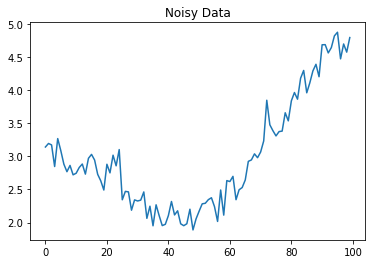

In [4]:
# --- OUR CODE ---
### PART 0: THE DATA ### 
realData = np.zeros(NUM)
noisyData = np.zeros((NUM,3))
results = np.zeros(NUM) 
# Parameters
p1 = np.linspace(-2,2,num=NUM)
p2 = np.linspace(6,12,num=NUM)

for i in range(NUM):
	realData[i] = realFun(p1[i],p2[i])
	noisyData[i,:] = [p1[i],p2[i],noisyFun(p1[i],p2[i])]

noisyData[:,-1]+=createNoiseVector()

plt.plot(noisyData[:,-1])
plt.title("Noisy Data")

In [5]:
### PART 1: MODEL ###
# Network Parameters
n_input = 2
n_hidden_1 = 5 
n_hidden_2 = 10
n_hidden_3 = 12
n_hidden_4 = 14
n_hidden_5 = 15
n_hidden_6 = 12
n_hidden_7 = 8
n_hidden_8 = 5
n_output = 1 

tf.reset_default_graph()
# https://github.com/tensorflow/tensorflow/issues/859

# Store layers weight & bias
weights = {
	'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
	'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
	'h3': tf.Variable(tf.random_normal([n_hidden_2,n_hidden_3])),
	'h4': tf.Variable(tf.random_normal([n_hidden_3,n_hidden_4])),
	'h5': tf.Variable(tf.random_normal([n_hidden_4,n_hidden_5])),
	'h6': tf.Variable(tf.random_normal([n_hidden_5,n_hidden_6])),
	'h7': tf.Variable(tf.random_normal([n_hidden_6,n_hidden_7])),
	'h8': tf.Variable(tf.random_normal([n_hidden_7,n_hidden_8])),
	'out': tf.Variable(tf.random_normal([n_hidden_8, n_output]))
}

biases = {
	'b1': tf.Variable(tf.zeros([n_hidden_1])),
	'b2': tf.Variable(tf.zeros([n_hidden_2])),
	'b3': tf.Variable(tf.zeros([n_hidden_3])),
	'b4': tf.Variable(tf.zeros([n_hidden_4])),
	'b5': tf.Variable(tf.zeros([n_hidden_5])),
	'b6': tf.Variable(tf.zeros([n_hidden_6])),
	'b7': tf.Variable(tf.zeros([n_hidden_7])),
	'b8': tf.Variable(tf.zeros([n_hidden_8])),
	'out': tf.Variable(tf.zeros([n_output]))
}


# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_output])

# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
layer_1 = tf.nn.sigmoid(layer_1)

layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
layer_2 = tf.nn.sigmoid(layer_2)

layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
layer_3 = tf.nn.sigmoid(layer_3)

layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
layer_4 = tf.nn.sigmoid(layer_4)

layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
layer_5 = tf.nn.sigmoid(layer_5)

layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
layer_6 = tf.nn.sigmoid(layer_6)

layer_7 = tf.add(tf.matmul(layer_6, weights['h7']), biases['b7'])
layer_7 = tf.nn.sigmoid(layer_7)

layer_8 = tf.add(tf.matmul(layer_7, weights['h8']), biases['b8'])
layer_8 = tf.nn.sigmoid(layer_8)

# Output layer with linear activation
pred = tf.add(tf.matmul(layer_8, weights['out']), biases['out'])

# Define loss and optimizer
cost = tf.reduce_sum(tf.abs(tf.subtract(pred, y)))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

In [6]:
### PART 2: RUN THE MODEL ###

config = tf.ConfigProto()
config.gpu_options.allow_growth=True

# Launch the graph
with tf.Session(config=config) as sess:
	# Initializing the variables
	sess.run(tf.global_variables_initializer())
	# Generating datasets
	trainingData,testingData,validationData = generateSets(noisyData,[0.7,0.2,0.1])

	for e in range(epochs):

		# Training cycle
		for i in range(0,trainingData.shape[0],b_size):
			x_raw = trainingData[i:i+b_size,:-1]
			y_raw = np.reshape(trainingData[i:i+b_size,-1],(b_size,1))

			# Run optimization op (backprop) and cost op (to get loss value)
			_, c = sess.run([optimizer, cost], feed_dict={x: x_raw,y: y_raw})
					

	# Testing cycle
	tmpErrorNoisy = 0
	tmpError = 0
	for i in range(testingData.shape[0]):
		x_raw = np.reshape(testingData[i,:-1],(1,2))
		prediction = pred.eval({x:x_raw})
		tmpErrorNoisy += abs(noisyFun(x_raw[0,0],x_raw[0,1])-prediction)
		tmpError += abs(realFun(x_raw[0,0],x_raw[0,1])-prediction)
	
	# Full Test (to check graphically)
	for i in range(NUM):
		x_raw = np.reshape(np.array([p1[i],p2[i]]),(1,2))
		results[i] = pred.eval({x:x_raw})

# Print average error
print(tmpErrorNoisy/testingData.shape[0])
print(tmpError/testingData.shape[0])

[[0.14137837]]
[[0.08691408]]


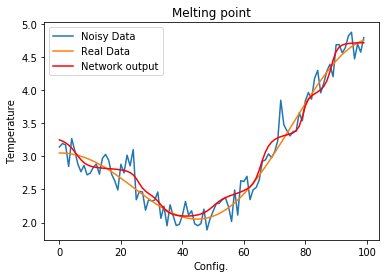

In [7]:
# Plot results
plt.plot(noisyData[:,-1],label="Noisy Data")
plt.plot(realData,label="Real Data")
plt.plot(results,label="Network output",color="red")
plt.ylabel("Temperature")
plt.xlabel("Config.")
plt.title("Melting point")
plt.legend()
plt.show()